<center><h1>Dimensión fractal en diferentes conjuntos</h1></center>

Se calcula la dimensión de Minkowski-Bouligand de diferentes conjuntos:

- Una recta.
- Un cuadrado.
- Triángulo de Sierpinski.
- Código de barras.
- Juego del caos en una subcadena del cromosoma 19.
- Juego del caos en una cadena aleatoria con el mismo diccionario del DNA.

Todos ellos con el mismo número de elementos. Inicialmente se hizo para 1,000,000 puntos aunque este número puede modificarse cambiando el valor de la variable <i>length</i>.

In [1]:
import sys
sys.path.insert(0, "Scripts")

from libraries import *
from fractal_dimension import *

In [2]:
length = 1000000

## Comparación entre conteo de cajas y dimensión topológica

La recta, el cuadrado, el triángulo de Sierpinski y el conjunto de Henón tienen dimensiones: $1, 2, 1.584$ y $1.26$, respectivamente. Se calcula la dimensión de Minkowski-Bouligand para estos conjuntos con el fin de validar el correcto funcionamiento de la paquetería desarrollada en el presente proyecto para el cálculo de la dimensión.

## Recta

Una recta horizontal

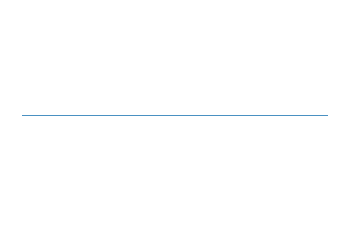

coefficient (fractal dimension) = 1.0000000000000002


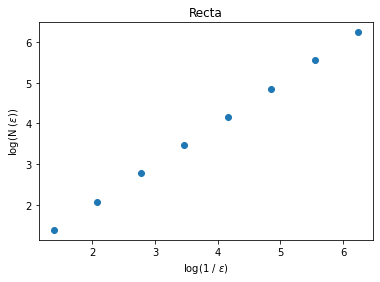

<Figure size 432x288 with 0 Axes>

In [3]:
# Generación de coordinadas
line_x = np.linspace(0,1,length)
line_y = [0.5 for x in line_x]

# Graficación del conjunto
plt.scatter(line_x,line_y,s=0.00005)
plt.axis('equal')
plt.axis('off')
# Descomentar la siguiente línea de código para guardar la figura
#plt.savefig("ilustraciones/plot/Otros/{}".format("recta"),dpi=150)
plt.show()
plt.clf()

# Cálculo de la dimensión
Line_dimension = Frac_dimension_computation_name_path(line_x,line_y,"Recta","ilustraciones/dim/Otros/Recta")

## Cuadrado

Generación de puntos aleatorios dentro de un cuadrado

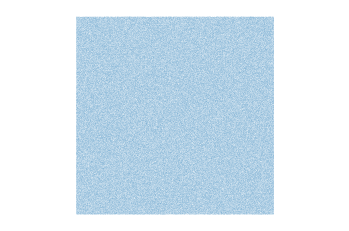

coefficient (fractal dimension) = 1.9973424901753036


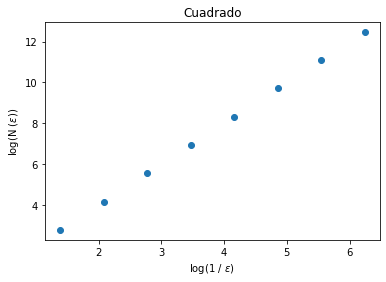

<Figure size 432x288 with 0 Axes>

In [4]:
# La generación de los puntos aleatorios
rec_coordinates = np.random.rand(length,2)

# Seleccionamos las x,y como listas
rec_x = rec_coordinates[:,0]
rec_y = rec_coordinates[:,1]

# Graficamos para visualizar el conjunto
plt.scatter(rec_x,rec_y,s=0.00005)
plt.axis('equal')
plt.axis('off')

# Descomentar para guardar la gráfica
#plt.savefig("ilustraciones/plot/Otros/{}".format("cuadrado"),dpi=150)
plt.show()
plt.clf()

# Dimensión
Square_dimension = Frac_dimension_computation_name_path(rec_x,rec_y,"Cuadrado","ilustraciones/dim/Otros/Cuadrado")

# Juego del caos

Probamos ahora el correcto funcionamiento de las librerías desarrolladas específicamente para medir la dimensión fractal de conjuntos generados a partir del juego del caos en dos diferentes escenarios: El triángulo de Sierpinski

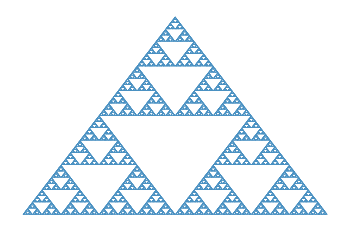

coefficient (fractal dimension) = 1.5849625007211565


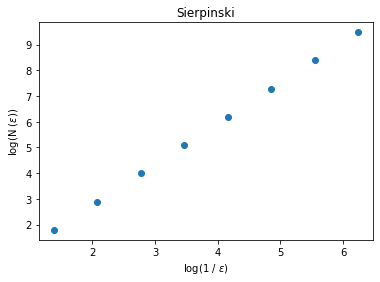

<Figure size 432x288 with 0 Axes>

In [5]:
sier_x,sier_y = SFI.Sierpinski_coordinates(Iteraciones=length)

plt.scatter(sier_x,sier_y,s=0.00005)
plt.axis('off')
# Decomentar para graficar
#plt.savefig("ilustraciones/plot/Otros/{}".format("sierpinski"),dpi=150)
plt.show()
plt.clf()

# Dimensión
Sierpinski_dimension = Frac_dimension_computation_name_path(sier_x,sier_y,
                                                            "Sierpinski","ilustraciones/dim/Otros/Sierpinski")

# Mapa de Henón

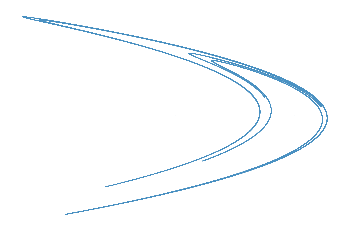

coefficient (fractal dimension) = 1.2302328555684185


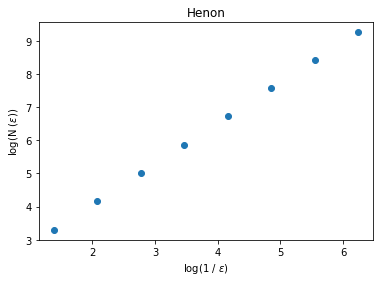

CPU times: user 14.7 s, sys: 223 ms, total: 14.9 s
Wall time: 14.9 s


<Figure size 432x288 with 0 Axes>

In [6]:
%%time
henon_x,henon_y = SFI.henon(length)

plt.scatter(henon_x,henon_y,s=0.00005)
plt.axis('off')
# Decomentar para graficar
plt.savefig("ilustraciones/plot/Otros/{}".format("henon"),dpi=150)
plt.show()
plt.clf()

Henon_dimension = Frac_dimension_computation_name_path(henon_x,
                                                       henon_y,
                                                       "Henon",
                                                       "ilustraciones/dim/Otros/Henon")

## Código de barras

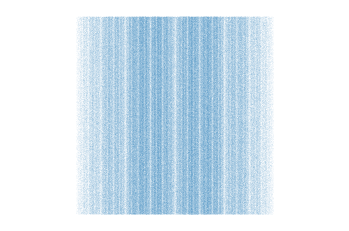

coefficient (fractal dimension) = 1.9887853325668243


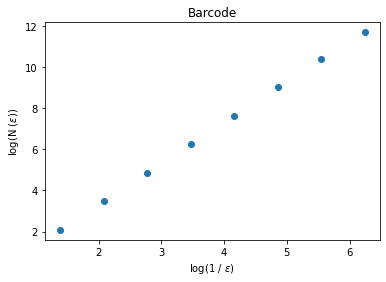

<Figure size 432x288 with 0 Axes>

In [7]:
# Generación del conjunto
line_r_x = sorted(sier_x)
line_r_y = [0.5 + 1*(np.random.rand()) for x in line_r_x]

# Graficación
plt.scatter(line_r_x,line_r_y,s=0.00005)
plt.axis('equal')
plt.axis('off')
#plt.savefig("ilustraciones/plot/Otros/{}".format("barcode"),dpi=150)
plt.show()
plt.clf()

# Dimensión
Barcode_dimension = Frac_dimension_computation_name_path(line_r_x,line_r_y,
                                                         "Barcode",
                                                         "ilustraciones/dim/Otros/Código de barras")

## Genoma humano

Juego del caos en una subcadena del cromosoma 19 y el arreglo de vértices dado por el diccionario <i>Dic_2</i>.

In [8]:
Dic_2 = {'A':(0,0),'C':(1,0),'G':(1,1),'T':(0,1)}

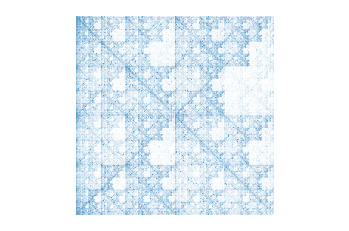

coefficient (fractal dimension) = 1.9579468262818678


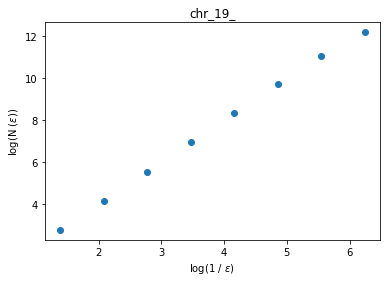

<Figure size 432x288 with 0 Axes>

In [9]:
Chr = "chr_19_.txt"
Str_Chr = load_txt_file("data/",Chr)

# trimming the string to a length of maximum 1,000,000 nucleotides
CG_Chr = chaos_game_chromosome(Str_Chr[0:min(len(Str_Chr),length)],Dic_2)

# grabbing the coordinates
CG_x = [i[0] for i in CG_Chr]
CG_y = [i[1] for i in CG_Chr]

# Plotting 
plt.scatter(CG_x,CG_y,s=0.0000125)
plt.axis('equal')
plt.axis('off')
# plt.savefig("ilustraciones/plot/ch19/{}.png".format(Chr.split(".")[0]),dpi=200)
plt.show()
plt.clf()

Chr_19_Fd = Frac_dimension_computation_name_path(CG_x,CG_y,
                                                 Chr.split(".")[0],
                                                 "ilustraciones/dim/ch19/{}".format(Chr.split(".")[0]))

## Cadena de aleatoria de caracteres

A partir del diccionario de nucleótidos, se genera una cadena de letras generadas aleatoreamente con distribución de probabilidad uniforme.

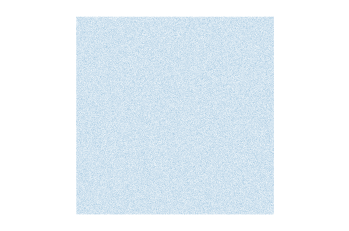

coefficient (fractal dimension) = 1.9973476476442626


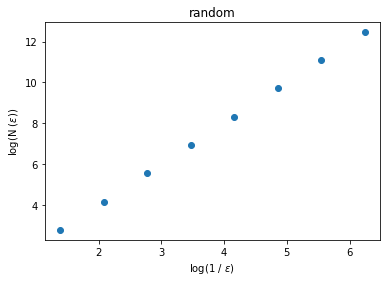

<Figure size 432x288 with 0 Axes>

In [10]:
Str_Chr = random_nuc(length)

# trimming the string to a length of maximum 1,000,000 nucleotides
CG_Chr = chaos_game_chromosome(Str_Chr[0:min(len(Str_Chr),length)],Dic_2)

# grabbing the coordinates
CG_x = [i[0] for i in CG_Chr]
CG_y = [i[1] for i in CG_Chr]

plt.scatter(CG_x,CG_y,s=0.0000125)
plt.axis('equal')
plt.axis('off')
# plt.savefig("ilustraciones/plot/random/{}.png".format("random"),dpi=200)
plt.show()
plt.clf()

Chr_19_Fd = Frac_dimension_computation_name_path(CG_x,CG_y,
                                                 "random",
                                                 "ilustraciones/dim/random/{}".format("random"))